# Data Preperation

## Setup

In [79]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# Imports for Correlation, Summarizer and ChiSquareTest
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.stat import Summarizer
from pandas.plotting import parallel_coordinates

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Spark libs
from pyspark.sql.session import SparkSession

# helper functions
from helpers.helper_functions import translate_to_file_string

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

inputFile = translate_to_file_string("./data/Data_Preparation_Result.csv")

## Create Spark Session

In [4]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("RKIDATAUNDERSTANDING")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)   
print(df.printSchema())

root
 |-- Bundesland: string (nullable = true)
 |-- BundeslandIndex: integer (nullable = true)
 |-- Landkreis: string (nullable = true)
 |-- LandkreisIndex: integer (nullable = true)
 |-- Altersgruppe: string (nullable = true)
 |-- AltersgruppeIndex: double (nullable = true)
 |-- Geschlecht: string (nullable = true)
 |-- GeschlechtIndex: double (nullable = true)
 |-- FallStatus: string (nullable = true)
 |-- FallStatusIndex: double (nullable = true)

None


In [5]:
df.count()

3675296

## Lagemaße

In [6]:
printDf(df.summary())

,summary,Bundesland,BundeslandIndex,Landkreis,LandkreisIndex,Altersgruppe,AltersgruppeIndex,Geschlecht,GeschlechtIndex,FallStatus,FallStatusIndex
0,count,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296
1,mean,None,7.96834676717195,None,8299.551207848293,None,1.2410355519664267,None,0.4848072100859359,None,0.0793993191296701
2,stddev,None,3.674480465407683,None,3652.432864601237,None,1.3592062662803304,None,0.49976919382208435,None,0.3480989234232694
3,min,Baden-Württemberg,1,LK Ahrweiler,1001,A00-A04,0.0,M,0.0,GENESEN,0.0
4,25%,None,5,None,5562,None,0.0,None,0.0,None,0.0
5,50%,None,8,None,8128,None,1.0,None,0.0,None,0.0
6,75%,None,9,None,9774,None,2.0,None,1.0,None,0.0
7,max,Thüringen,16,Städteregion Aachen,16077,A80+,5.0,W,1.0,NICHTEINGETRETEN,2.0


## Balkendiagramme
An dieser Stelle wurde bewusst darauf verzichtet Histogramme zu verwenden, da vor allem Qualitative Merkmale (z.B. Bundesland - Nominal, Geschlecht - Nominal,Altersgruppe - Ordinal,...) vorliegen. Stadtdessen wurde auf Bar-Charts zurückgegriffen.
Hinweis: Der Fallstatus nicht eingetreten bedeutet, dass die Person aktuell noch erkrankt ist.

### Initalisierung

In [7]:
# Init
%matplotlib inline
import matplotlib.pyplot as plt

### Balkendiagram Bundesland 
Nachfolgend soll ein Balkendiagramm der aktuellen Coronazahlen, nach dem Fallstatus je Bundesland erstellt werden. Dies soll Auskunft über die Verteilung der Fälle nach Bundesland geben.

In [8]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfBundeslandGrouped = df.groupBy("Bundesland").pivot("FallStatus").count().orderBy("GENESEN","GESTORBEN", "NICHTEINGETRETEN", ascending=False)
dfPandasBundesland = dfBundeslandGrouped.toPandas()
dfBundeslandGrouped.show()


+--------------------+-------+---------+----------------+
|          Bundesland|GENESEN|GESTORBEN|NICHTEINGETRETEN|
+--------------------+-------+---------+----------------+
| Nordrhein-Westfalen| 758263|    16710|           28721|
|              Bayern| 606693|    14935|           16604|
|   Baden-Württemberg| 464304|     9933|           16976|
|              Hessen| 267416|     7319|           11376|
|             Sachsen| 262223|     9656|           11504|
|       Niedersachsen| 246529|     5608|            5524|
|              Berlin| 171545|     3482|            3194|
|     Rheinland-Pfalz| 144334|     3724|            4366|
|           Thüringen| 119711|     4199|            3448|
|         Brandenburg| 101857|     3726|            2575|
|      Sachsen-Anhalt|  91590|     3311|            3373|
|             Hamburg|  71865|     1557|            2675|
|  Schleswig-Holstein|  59752|     1591|            1604|
|Mecklenburg-Vorpo...|  41838|     1120|             850|
|            S

Saving figure attribute_bar_plots


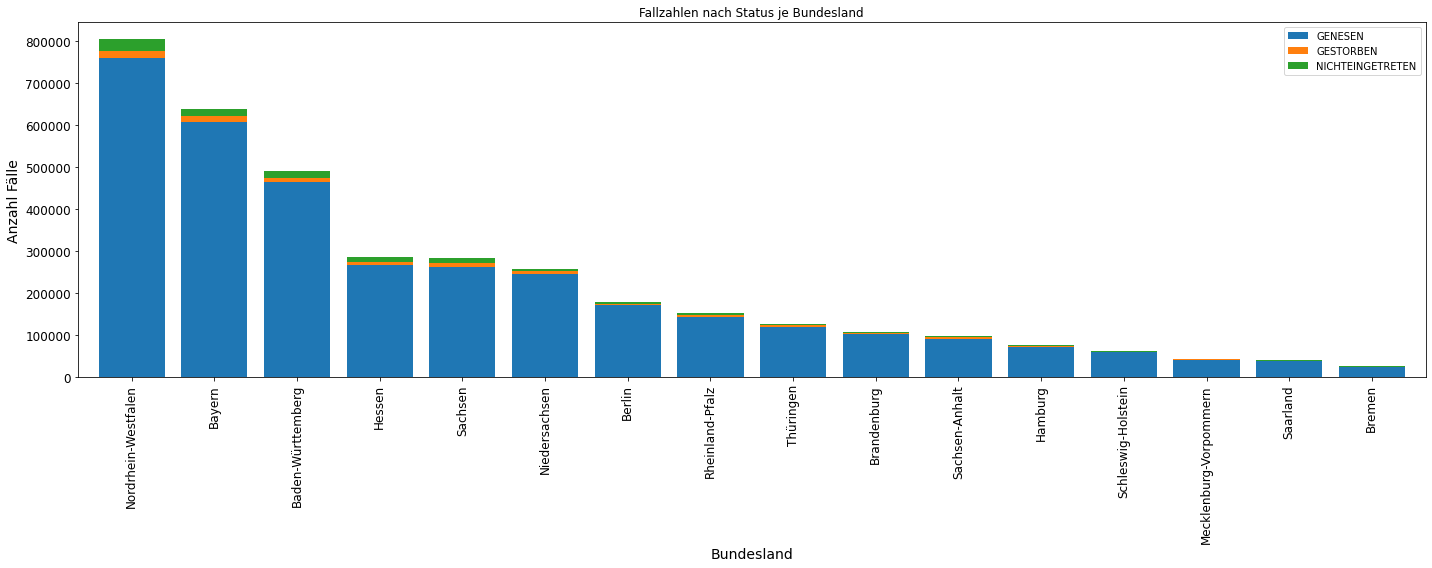

In [9]:
# Erstellen des Balkendiagramms
ax = dfPandasBundesland.plot.bar(x='Bundesland', ylabel="Anzahl Fälle",width=0.8, title="Fallzahlen nach Status je Bundesland", figsize=(20,8), rot=90, stacked=True)
save_fig("attribute_bar_plots")
plt.show()


### Balkendiagram Geschlecht 
Nachfolgend soll ein Balkendiagramm der aktuellen Coronazahlen nach dem Fallstatus je Bundesland erstellt werden. Dies soll Auskunft über die Verteilung der Fälle nach Bundesland geben.

In [10]:
# Vorbereiten des DataFrames durch Gruppieren des Bundeslands und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfGeschlechtGrouped = df.groupBy("Geschlecht").pivot("FallStatus").count().orderBy("GENESEN","GESTORBEN", "NICHTEINGETRETEN", ascending=False)
dfPandasGeschlecht = dfGeschlechtGrouped.toPandas()
dfGeschlechtGrouped.show()

+----------+-------+---------+----------------+
|Geschlecht|GENESEN|GESTORBEN|NICHTEINGETRETEN|
+----------+-------+---------+----------------+
|         W|1795172|    42031|           56283|
|         M|1676658|    46319|           58833|
+----------+-------+---------+----------------+



Saving figure attribute_bar_plots


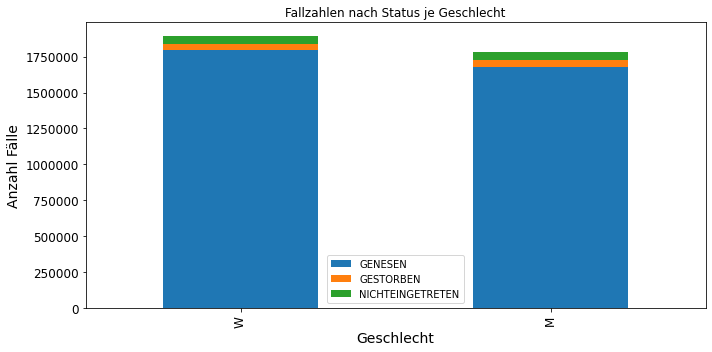

In [11]:
# Erstellen des Balkendiagramms
ax = dfPandasGeschlecht.plot.bar(x='Geschlecht', ylabel="Anzahl Fälle",width=0.5, title="Fallzahlen nach Status je Geschlecht", figsize=(10,5), rot=90, stacked=True)
# Don't want scaled Axis. Have look at https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi
ax.get_yaxis().get_major_formatter().set_scientific(False)
save_fig("attribute_bar_plots")
plt.show()


Dem Diagramm ist zu entnehmen, dass es mehr Genese bzw. insgesamt mehr an Corona erkrankte Menschen weiblichen Geschlechts gibt. Es liegt die Vermutung nahe, dass dies an der allgemein höheren Lebenserwartung von Frauen liegt, weshalb in höhen Altersgruppen auch mehr Frauen vertreten sind (bpb - Bundeszentrale für politische Bildung 2018).


### Balkendiagram Altersgruppe 
Nachfolgend soll ein Balkendiagramm der aktuellen Coronazahlen, nach dem Fallstatus je Bundesland erstellt werden. Dies soll Auskunft über die Verteilung der Fälle nach Bundesland geben.

In [14]:
# Vorbereiten des DataFrames durch Gruppieren des Bundeslands und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfAltersgruppeGrouped = df.groupBy("Altersgruppe").pivot("FallStatus").count().orderBy("GENESEN","GESTORBEN", "NICHTEINGETRETEN", ascending=False)
dfAltersgruppePandas = dfAltersgruppeGrouped.toPandas()
dfAltersgruppeGrouped.show()

+------------+-------+---------+----------------+
|Altersgruppe|GENESEN|GESTORBEN|NICHTEINGETRETEN|
+------------+-------+---------+----------------+
|     A35-A59|1359778|     3629|           42499|
|     A15-A34|1045569|      169|           35357|
|     A60-A79| 499710|    25978|           14257|
|     A05-A14| 252159|        6|           14493|
|        A80+| 225206|    58560|            3686|
|     A00-A04|  89408|        8|            4824|
+------------+-------+---------+----------------+



Saving figure attribute_bar_plots


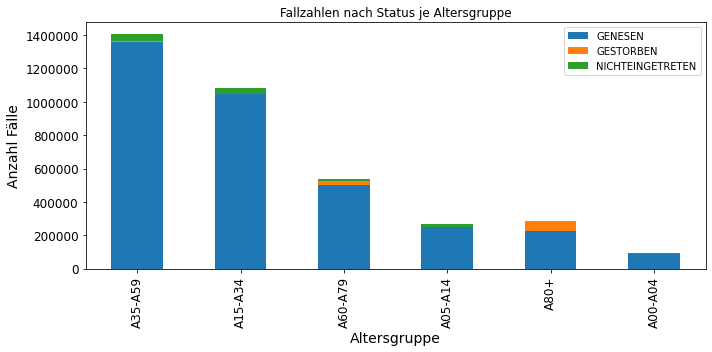

In [15]:
# Erstellen des Balkendiagramms
ax = dfAltersgruppePandas.plot.bar(x='Altersgruppe', ylabel="Anzahl Fälle",width=0.5, title="Fallzahlen nach Status je Altersgruppe", figsize=(10,5), rot=90, stacked=True)
# Don't want scaled Axis. Have look at https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi
ax.get_yaxis().get_major_formatter().set_scientific(False)
save_fig("attribute_bar_plots")
plt.show()

### Verstorben nach Altersgruppe und Geschlecht

In [16]:
# Vorbereiten des DataFrames durch Gruppieren des Bundeslands und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfVerstorbenGrouped = df.filter(df.FallStatus == "GESTORBEN").groupBy("Altersgruppe").pivot("Geschlecht").count().orderBy("W","M", ascending=True)
dfVerstorbenPandas = dfVerstorbenGrouped.toPandas()
dfVerstorbenGrouped.show()

+------------+-----+-----+
|Altersgruppe|    M|    W|
+------------+-----+-----+
|     A05-A14|    3|    3|
|     A00-A04|    2|    6|
|     A15-A34|  109|   60|
|     A35-A59| 2547| 1082|
|     A60-A79|17039| 8939|
|        A80+|26619|31941|
+------------+-----+-----+



Saving figure attribute_bar_plots


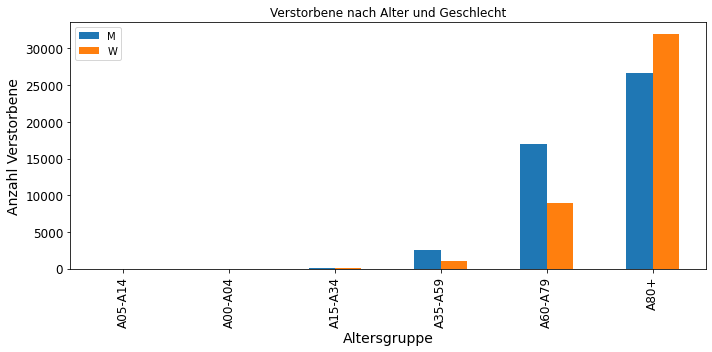

In [17]:
# Erstellen des Balkendiagramms
ax = dfVerstorbenPandas.plot.bar(x='Altersgruppe', ylabel="Anzahl Verstorbene",width=0.5, title="Verstorbene nach Alter und Geschlecht", figsize=(10,5), rot=90)
# Don't want scaled Axis. Have look at https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi
ax.get_yaxis().get_major_formatter().set_scientific(False)
save_fig("attribute_bar_plots")
plt.show()

## Korrelationsanalyse

In [56]:
# Aufbau des Feature-Vectors
assembler =  VectorAssembler(outputCol="features", inputCols=["FallStatusIndex", "GeschlechtIndex","AltersgruppeIndex", "LandkreisIndex"])
featureVector = assembler.transform(df)

def prettyPrintDenseMatrix(dm, collArray) :
    rows = dm.toArray().tolist()
    dfDM = spark.createDataFrame(rows,collArray)
    newDf = dfDM.toPandas()
    from IPython.display import display, HTML
    return HTML(newDf.to_html())


Die nachfolgenden Korrelationsanalysen weisen auf, dass die Features 'Alter' und 'Fallstatus' im Vergleich zu den anderen Merkmalen den größten Zusammenhang besitzen. Im Blick auf alle Coronafälle scheint es zwar keine signifikante Korrelation zwischen Todesfall und Alter zu geben. Jedoch kann mit Blick auf die Altersgruppe gesagt werden, dass ca. 20.63% aller über 80 Jährigen die an Corona erkrankt sind starben. Bei den Erkrankten zwischen 60 und 79 sind es 4,9%. Zu diesen beiden Altersgruppen lassen sich bereits 95.7% aller Verstorbenen zuordnen. Es kann also mit Sicherheit gesagt werden, dass das Risiko an Corona zu sterben bei älteren Menschen deutlich höher ist.

### Korrelationsanalyse nach Pearson

In [57]:
corPearson = Correlation.corr(featureVector, "features").head()

Pearson correlation matrix:



In [61]:
prettyPrintDenseMatrix(corPearson[0], ["FallStatus", "Geschlecht", "Altersgruppe", "Landkreis"])
print("Pearson correlation matrix:\n")

,FallStatus,Geschlecht,Altersgruppe,Landkreis
0,1.000000,0.015634,0.144115,0.019173
1,0.015634,1.000000,-0.013519,-0.024130
2,0.144115,-0.013519,1.000000,0.002666
3,0.019173,-0.024130,0.002666,1.000000


### Korrelationsanalyse nach Spearman

In [59]:
corSpearmen = Correlation.corr(featureVector, "features", "spearman").head()
print("Spearman correlation matrix:\n")

Spearman correlation matrix:



In [71]:
prettyPrintDenseMatrix(corSpearmen[0], ["FallStatus", "Geschlecht", "Altersgruppe", "Landkreis"])

,FallStatus,Geschlecht,Altersgruppe,Landkreis
0,1.000000,0.015580,0.124740,0.009856
1,0.015580,1.000000,-0.013597,-0.020454
2,0.124740,-0.013597,1.000000,0.004524
3,0.009856,-0.020454,0.004524,1.000000


## Hypothesenüberprüfung

In [54]:
# Aufbau des Feature-Vectors
assembler =  VectorAssembler(outputCol="features", inputCols=["GeschlechtIndex","AltersgruppeIndex","BundeslandIndex"])
featureVector = assembler.transform(df)

### Chi Quadrad-Test
Bezüglich der Interpreation der Ergebniswerte, sei auf die hießigen Statistischen Werke verwiesen.

In [76]:
ciSquare = ChiSquareTest.test(featureVector, "features", "FallStatusIndex")
ciSquare.show(truncate=False)

+-----------------+----------------+-----------------------------------------------------------------+
|pValues          |degreesOfFreedom|statistics                                                       |
+-----------------+----------------+-----------------------------------------------------------------+
|[0.0,0.0,0.0,0.0]|[4, 2, 10, 822] |[7350592.0,917.6892202754859,479142.3800822805,58699.35755308365]|
+-----------------+----------------+-----------------------------------------------------------------+



## Histogramm
### Histogramm über Zeitverlauf

In [ ]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfHist = df.select("")
dfVerstorbenPandas = dfVerstorbenGrouped.toPandas()
dfVerstorbenGrouped.show()

